En todo este borrador (se llama borrador porque dividimos al dataset original luego de hacer los imputers, escalar los datos y hacer los encoders, lo cual está mal) esta lo que estuvimos haciendo de redes neuronales y por qué en el definitivo nos quedamos con lo que nos quedamos (lo que consideramos más relevante).

In [ ]:
from google.colab import drive
drive.mount('/drive')

In [ ]:
!pip install category_encoders

In [ ]:
import sys
sys.path.insert(0,'/drive/My Drive/TP_Datos_2C2021/parte_2/')

In [ ]:
from preprocessing import *

In [ ]:
import pandas as pd
import keras
from keras import backend as K
import numpy as np
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns
from keras.regularizers import l2
from tensorflow import keras
from keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow import math

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

plt.rcParams['figure.dpi'] = 70

# seteando tipo de grid en seaborn
sns.set_theme(style='ticks', palette=None, font_scale=.9) 

In [ ]:
VALUES_URL = 'https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs'
TARGET_URL = 'https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs'
TEST_URL = 'https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8'

def csv_a_df(url):
    url += '/export?format=csv'
    return pd.read_csv(url, index_col='id')

hamburguesas_values = csv_a_df(VALUES_URL)
hamburguesas_target = csv_a_df(TARGET_URL)
hamburguesas_test = csv_a_df(TEST_URL)

In [ ]:
ingenieria_de_features(hamburguesas_values)
ingenieria_de_features(hamburguesas_target)
ingenieria_de_features(hamburguesas_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    hamburguesas_values, hamburguesas_target, test_size=0.4,
    random_state=66, stratify=hamburguesas_target.llovieron_hamburguesas_al_dia_siguiente.astype(str)
)

In [ ]:
X_val_dev, X_holdout, y_val_dev, y_holdout = train_test_split(
    X_test, y_test, test_size=0.1,
    random_state=66, stratify=y_test.llovieron_hamburguesas_al_dia_siguiente.astype(str)
)

In [ ]:
hamburguesas_values_sn = knn_imputer(X_train)
hamburguesas_val_dev_sn = knn_imputer(X_val_dev)
hamburguesas_test_sn = knn_imputer(hamburguesas_test)

In [ ]:
hamburguesas_values_escalado = standar_scaler(hamburguesas_values_sn)
hamburguesas_val_dev_escalado = standar_scaler(hamburguesas_val_dev_sn)
hamburguesas_test_escalado = standar_scaler(hamburguesas_test_sn)

# Hashing trick

In [ ]:
hamburguesas_train_values_ht = hashing_trick_ecoding(hamburguesas_values_escalado)
hamburguesas_train_target_ohe = one_hot_encoding(y_train)
hamburguesas_val_dev_values_ht = hashing_trick_ecoding(hamburguesas_val_dev_escalado)
hamburguesas_val_dev_target_enc = one_hot_encoding(y_val_dev)

En todo este borrador (se llama borrador porque 

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(
    hamburguesas_values_ht, hamburguesas_target_ohe, test_size=0.4, random_state=66
)

In [ ]:
modelo = Sequential()
modelo.add(Dense(8, input_shape=(24,), activation='tanh'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hamburguesas_target_ohe.values

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [ ]:
y_train = hamburguesas_target_ohe.values

In [ ]:
historia = modelo.fit(
    hamburguesas_values_ht.values, hamburguesas_target_ohe.values, epochs=100
)

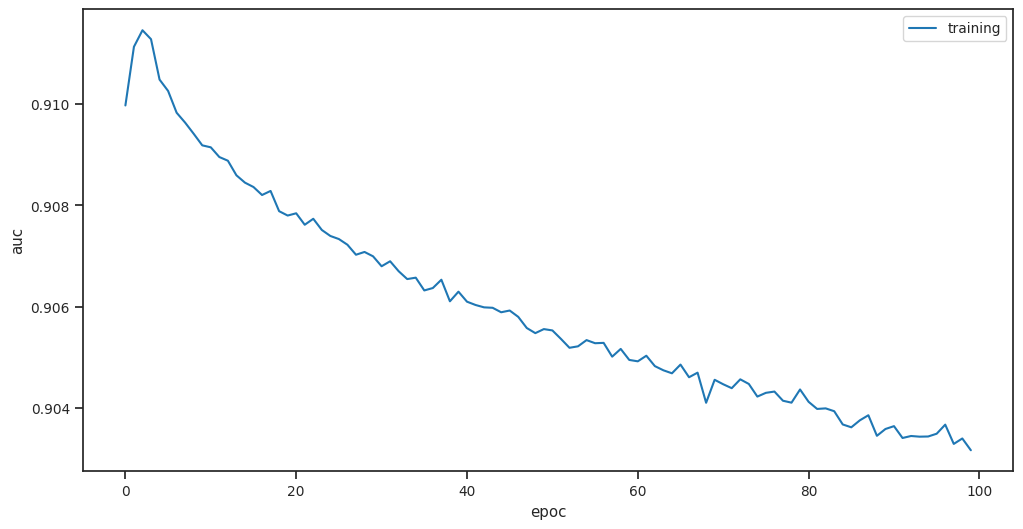

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("auc")
plt.xlabel("epoc")
plt.plot(historia.history["auc"], label="training")
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['AUC'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    hamburguesas_values_ht.values, hamburguesas_target_ohe.values, epochs=100
)

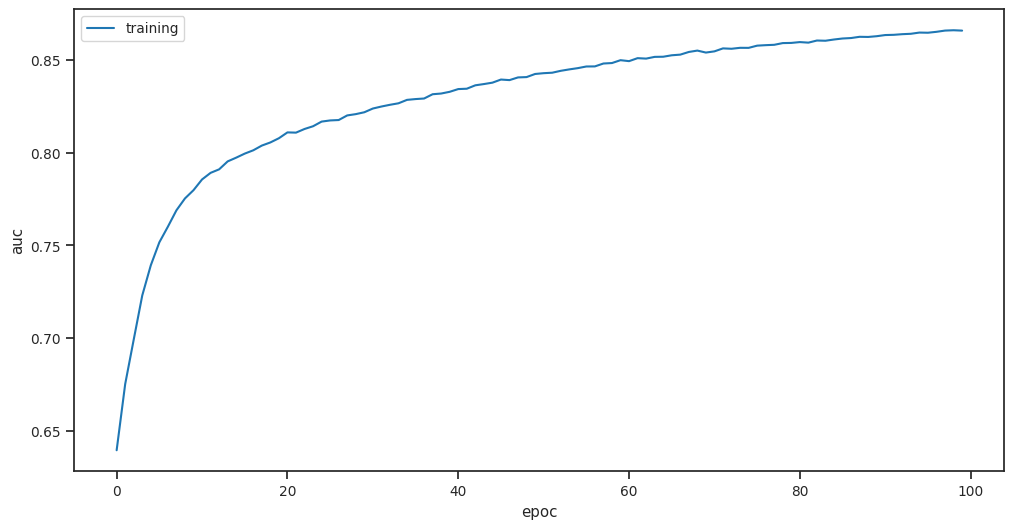

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("auc")
plt.xlabel("epoc")
plt.plot(historia.history["auc"], label="training")
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
from tensorflow import keras

In [ ]:
from keras import optimizers

In [ ]:
opt = keras.optimizers.RMSprop()
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                400       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    hamburguesas_values_ht.values, hamburguesas_target_ohe.values, epochs=100
)

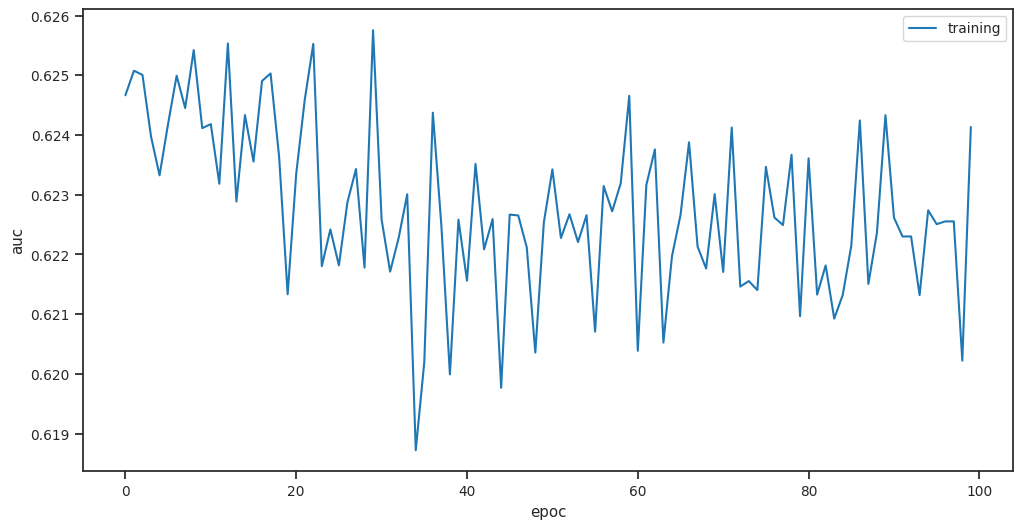

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("auc")
plt.xlabel("epoc")
plt.plot(historia.history["auc"], label="training")
plt.legend()

In [ ]:
from keras.regularizers import l2

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop()
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                400       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    hamburguesas_values_ht.values, hamburguesas_target_ohe.values, epochs=100
)

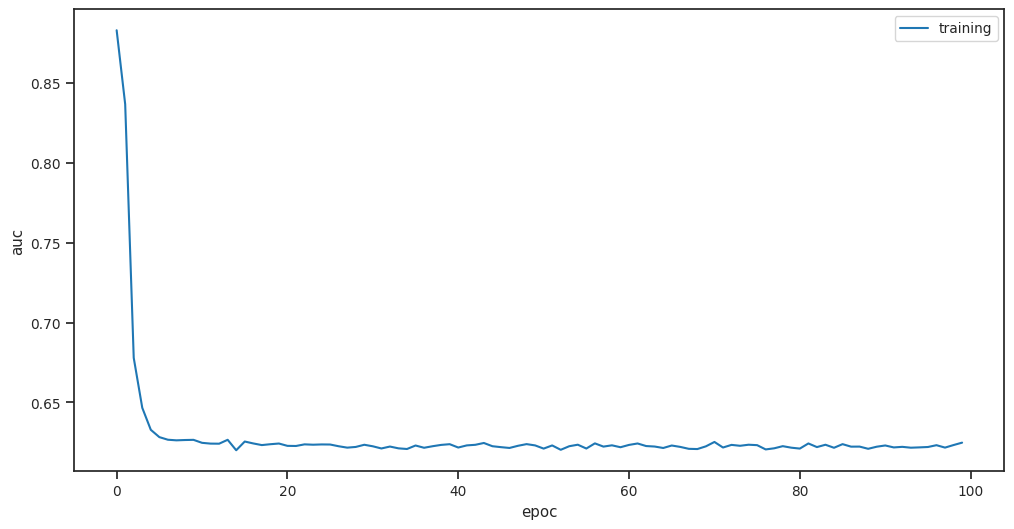

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("auc")
plt.xlabel("epoc")
plt.plot(historia.history["auc"], label="training")
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop(lr=0.0001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                400       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_values_ht.values, hamburguesas_target_ohe.values, epochs=1000
)

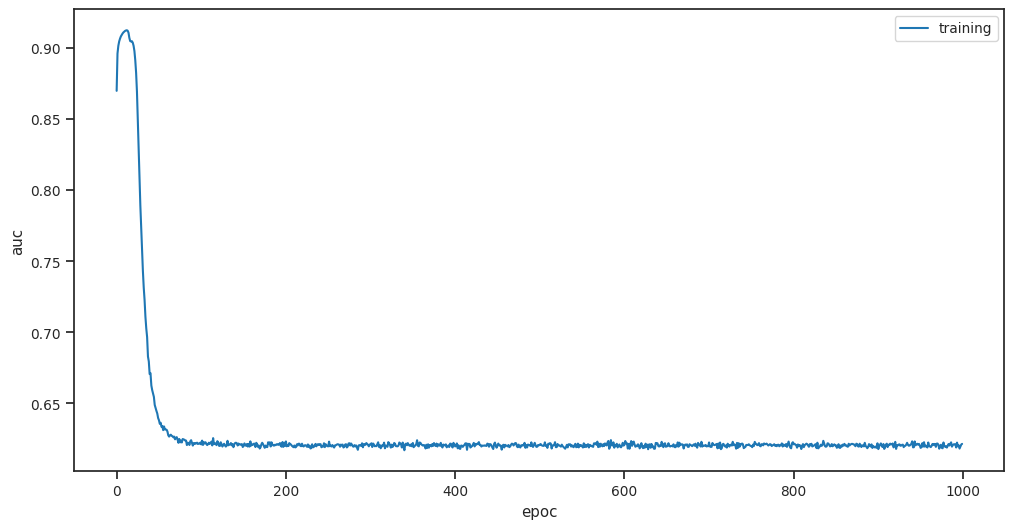

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("auc")
plt.xlabel("epoc")
plt.plot(historia.history["auc"], label="training")
plt.legend()

### SGD

In [ ]:
modelo = Sequential()
modelo.add(Dense(3, input_shape=(24,), activation='tanh'))
modelo.add(Dense(2, activation='softmax'))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['AUC'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 75        
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.3837 - auc: 0.9038


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.9037821888923645'

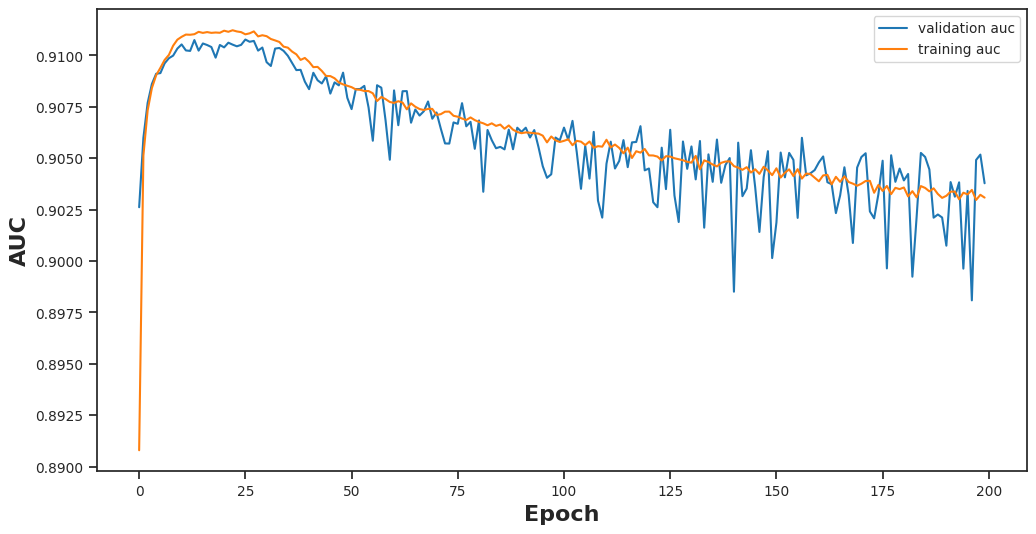

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(3, input_shape=(24,), activation='tanh'))
modelo.add(Dense(2, activation='softmax'))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 75        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)
#hamburguesas_train_values_ht = hashing_trick_ecoding(hamburguesas_values_escalado)
#hamburguesas_train_target_ohe = one_hot_encoding(y_train)
#hamburguesas_val_dev_values_ht = hashing_trick_ecoding(hamburguesas_val_dev_escalado)
#hamburguesas_val_dev_target_enc = one_hot_encoding(y_val_dev)

Epoch 1/200
2182/2182 [==============================] - 8s 3ms/step - loss: 0.4397 - auc: 0.8643 - Accuracy: 0.8020 - recall: 0.8002 - precision: 0.7820 - val_loss: 0.3794 - val_auc: 0.8996 - val_Accuracy: 0.8328 - val_recall: 0.8326 - val_precision: 0.8137
Epoch 2/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3728 - auc: 0.9026 - Accuracy: 0.8356 - recall: 0.8355 - precision: 0.8166 - val_loss: 0.3671 - val_auc: 0.9053 - val_Accuracy: 0.8394 - val_recall: 0.8394 - val_precision: 0.8204
Epoch 3/200
2182/2182 [==============================] - 5s 2ms/step - loss: 0.3665 - auc: 0.9060 - Accuracy: 0.8389 - recall: 0.8390 - precision: 0.8200 - val_loss: 0.3646 - val_auc: 0.9067 - val_Accuracy: 0.8415 - val_recall: 0.8417 - val_precision: 0.8226
Epoch 4/200
2182/2182 [==============================] - 5s 2ms/step - loss: 0.3649 - auc: 0.9072 - Accuracy: 0.8404 - recall: 0.8406 - precision: 0.8216 - val_loss: 0.3640 - val_auc: 0.9073 - val_Accuracy: 0.8430 - val_rec

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 3s 2ms/step - loss: 0.4096 - auc: 0.8971 - Accuracy: 0.8300 - recall: 0.8275 - precision: 0.8088


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8994265794754028'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.8300193548202515'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'La recall es: 0.8275163173675537'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.8087508678436279'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
from tensorflow import math

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'fn': 31782, 'fp': 9183, 'tn': 42821, 'tp': 0}

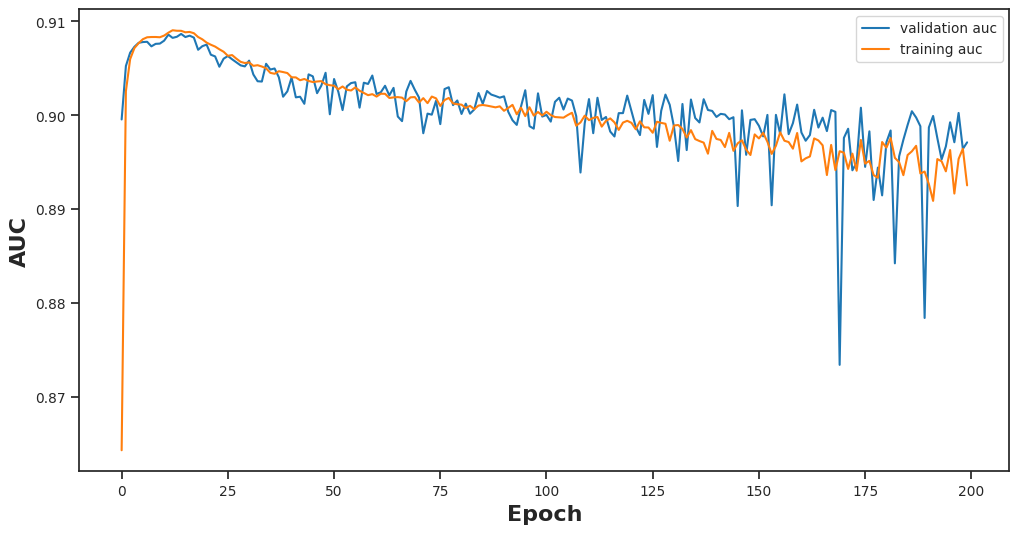

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(3, input_shape=(24,), activation='tanh'))
modelo.add(Dense(2, activation='softmax'))

In [ ]:
from tensorflow import keras

In [ ]:
opt = keras.optimizers.SGD(lr=0.1)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['AUC'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 75        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=500, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.4095 - auc: 0.8994


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8994200229644775'

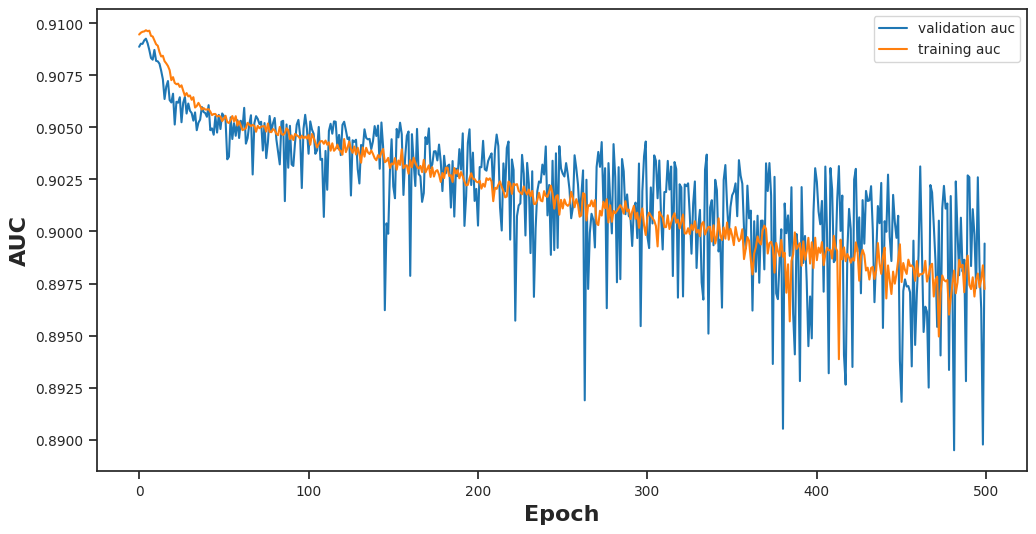

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(10, input_shape=(24,), activation='tanh'))
modelo.add(Dense(2, activation='softmax'))

In [ ]:
opt = keras.optimizers.SGD(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                250       
                                                                 
 dense_17 (Dense)            (None, 2)                 22        
                                                                 
Total params: 272
Trainable params: 272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.3746 - auc: 0.9046


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.9045762419700623'

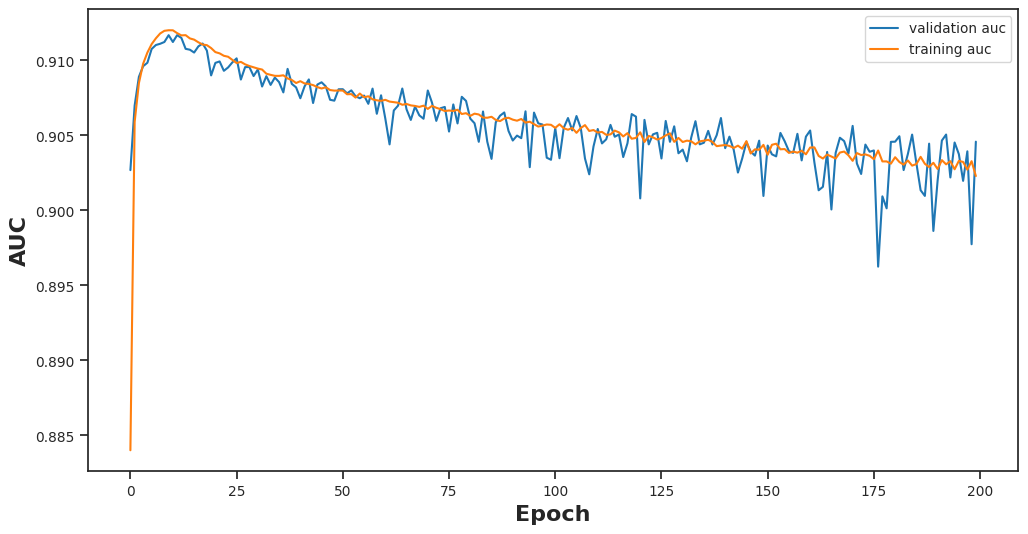

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(10, input_shape=(24,), activation='tanh'))
modelo.add(Dense(2, activation='softmax'))

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                250       
                                                                 
 dense_19 (Dense)            (None, 2)                 22        
                                                                 
Total params: 272
Trainable params: 272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.3645 - auc: 0.9084


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.9084457159042358'

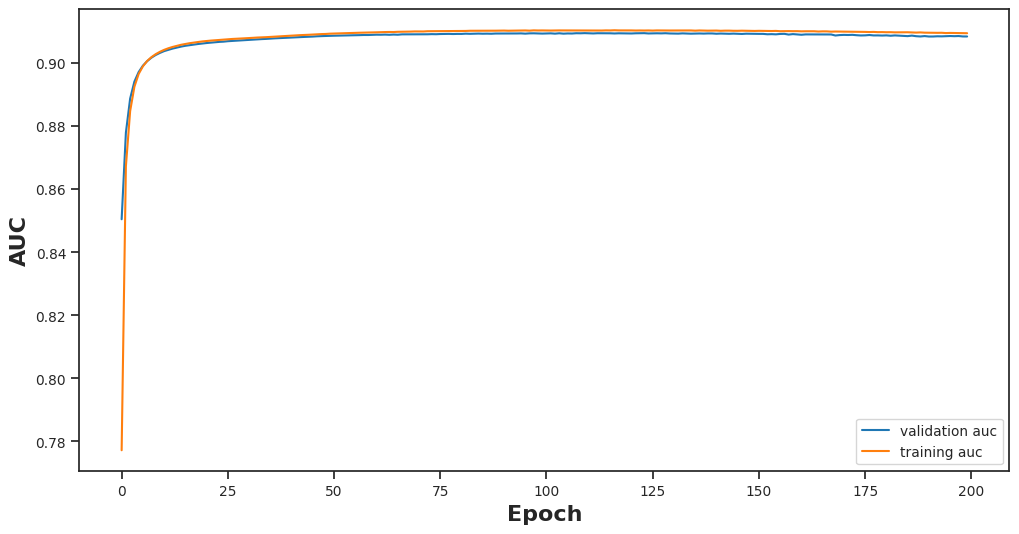

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['AUC'])
modelo.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                400       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.5178 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

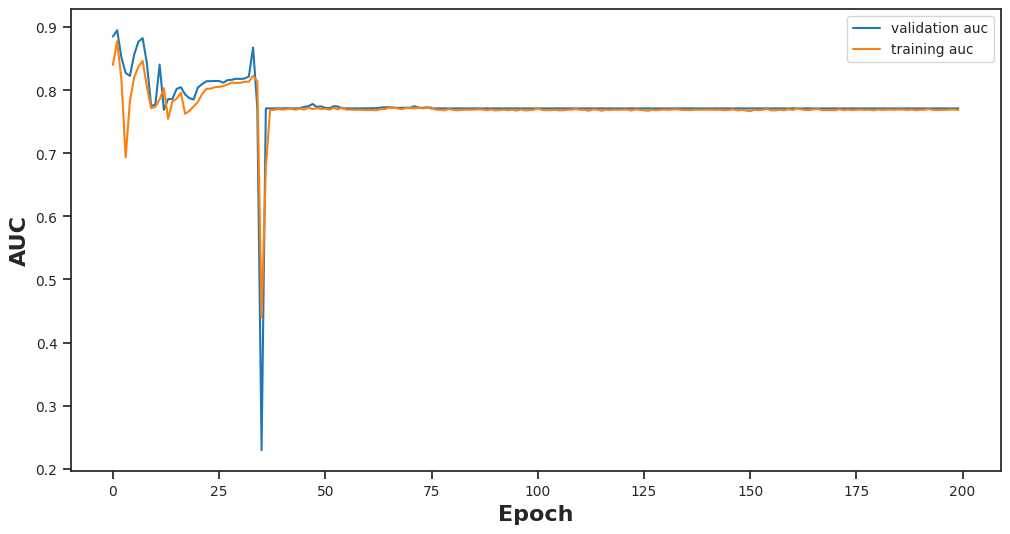

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                400       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_30 (Dense)            (None, 4)                 36        
                                                                 
 dense_31 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.5178 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

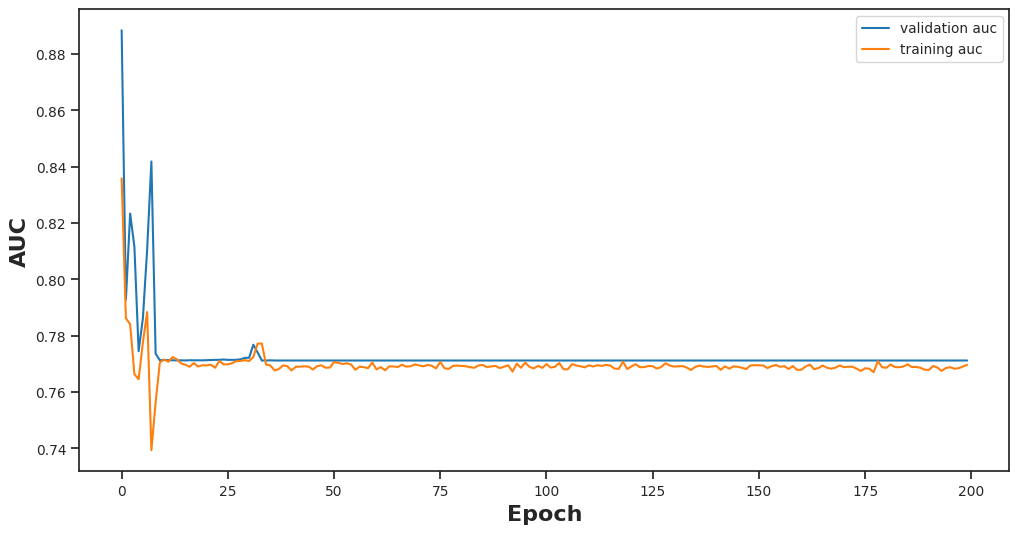

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                400       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.5178 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

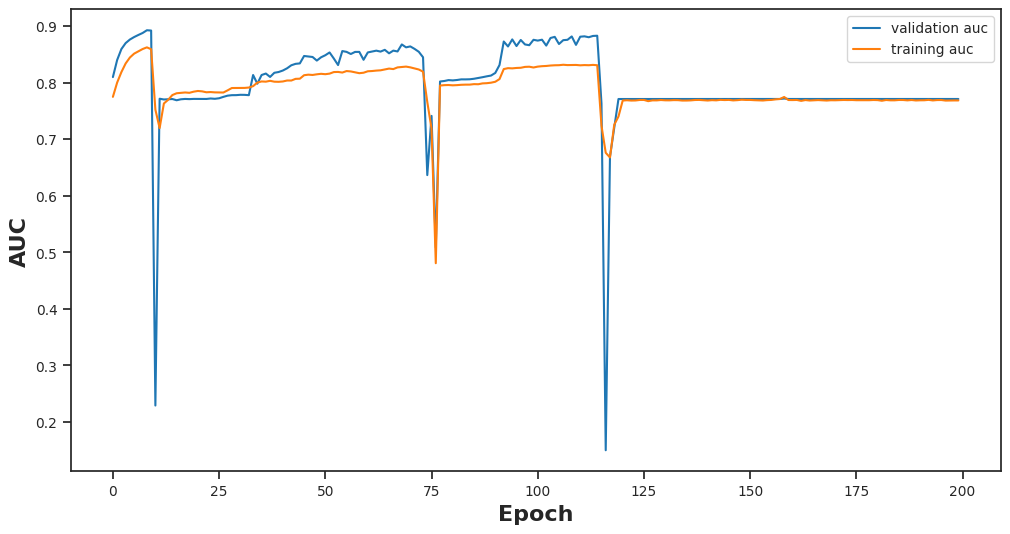

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['AUC'])
modelo.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                400       
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dropout_19 (Dropout)        (None, 8)                 0         
                                                                 
 dense_38 (Dense)            (None, 4)                 36        
                                                                 
 dense_39 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=100, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 287074995589349376.0000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

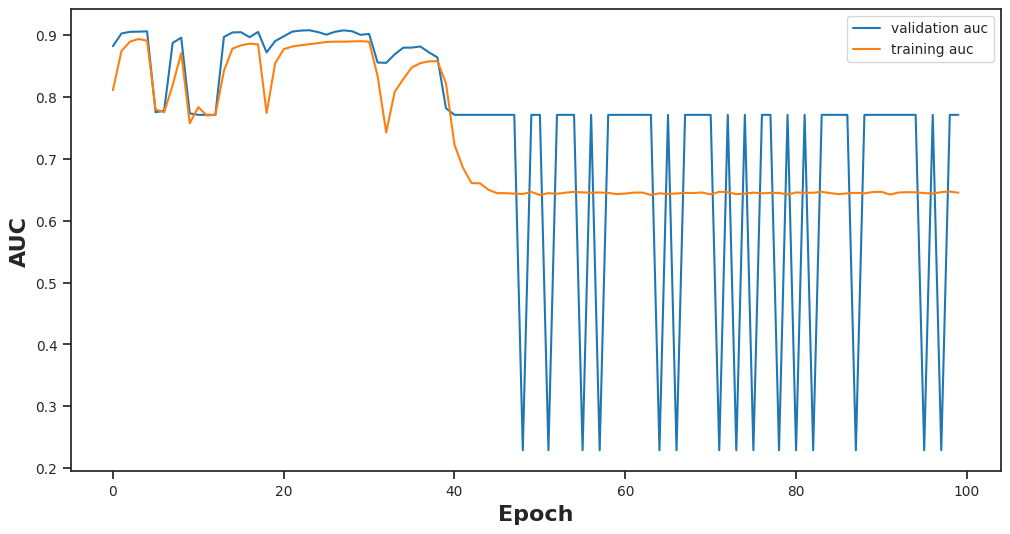

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=100, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 4421477332590325137408.0000 - auc: 0.2288


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.22877733409404755'

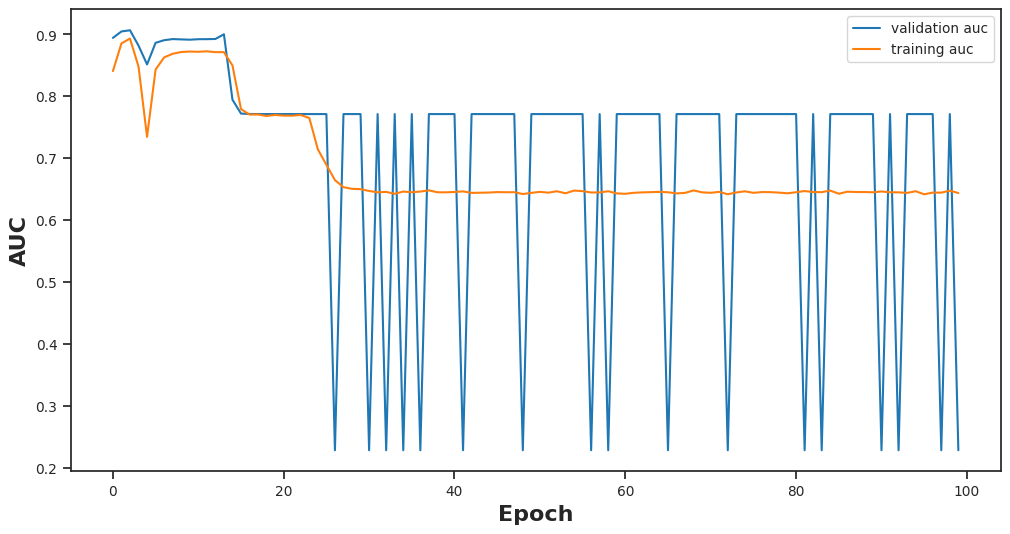

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                400       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=100, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.9660 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

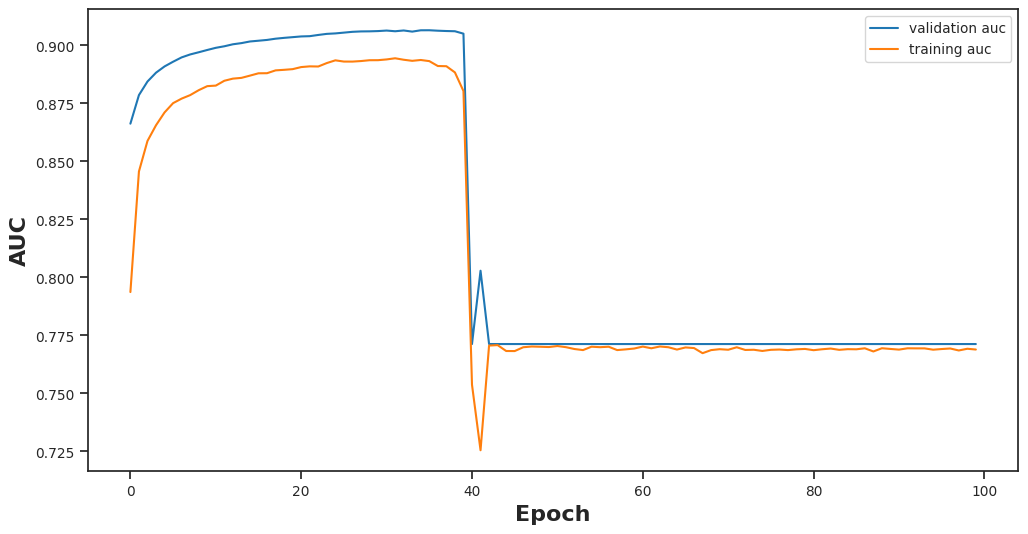

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

### Adam

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 6106051.0000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

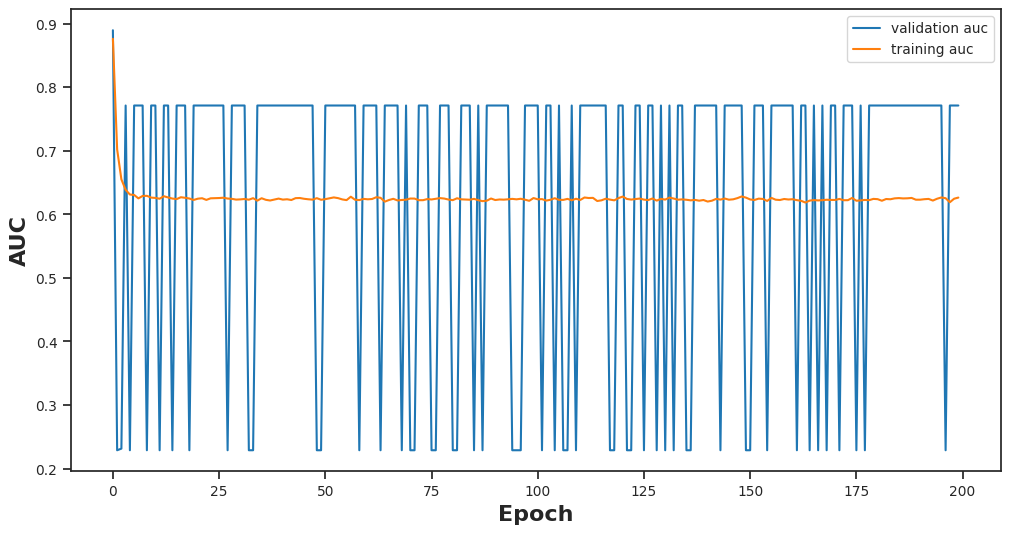

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adam(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                400       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 9632907264.0000 - auc: 0.2288


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

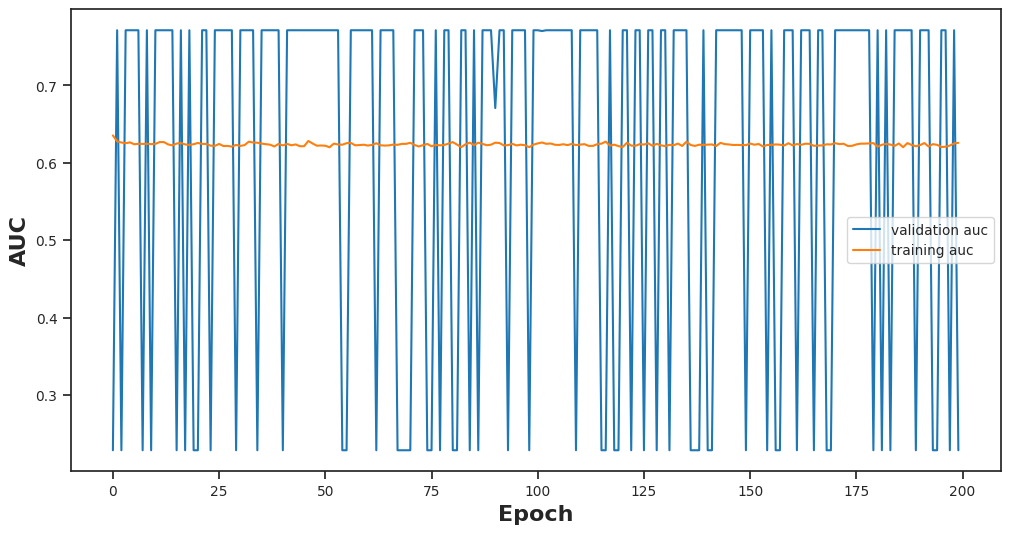

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adam(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                400       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_38 (Dense)            (None, 4)                 36        
                                                                 
 dense_39 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 4791977.0000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

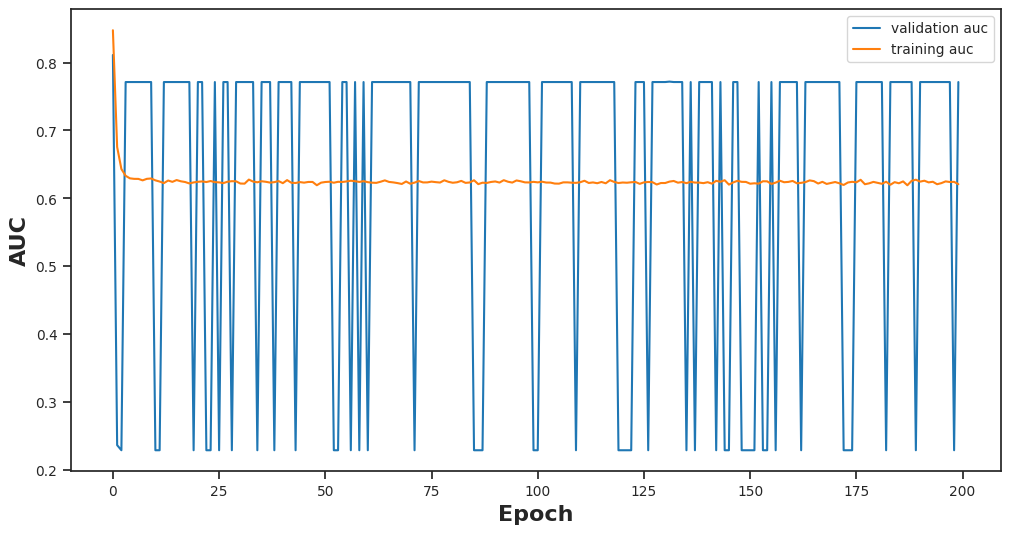

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                400       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 1519763.1250 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

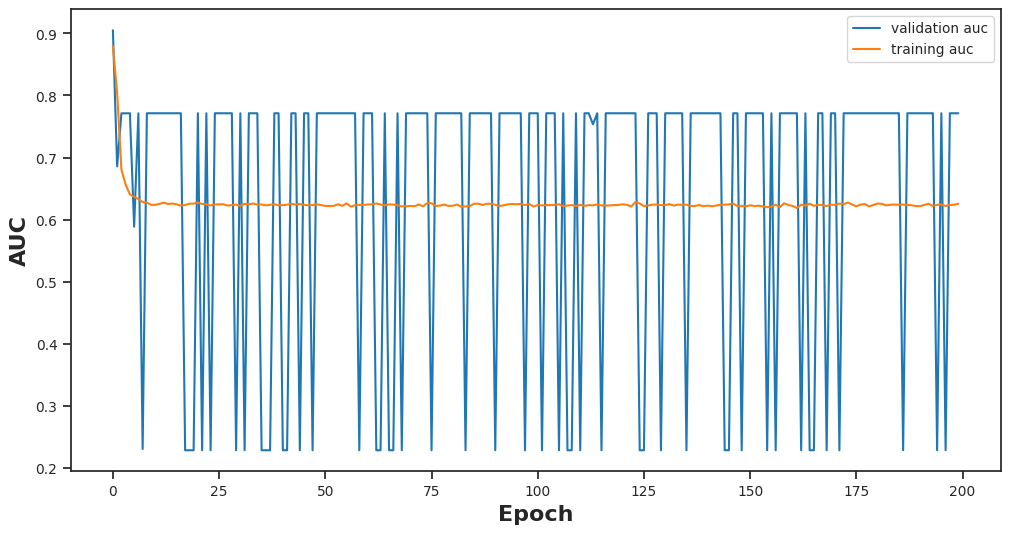

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adam(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                400       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 27653242880.0000 - auc: 0.2288


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.22877733409404755'

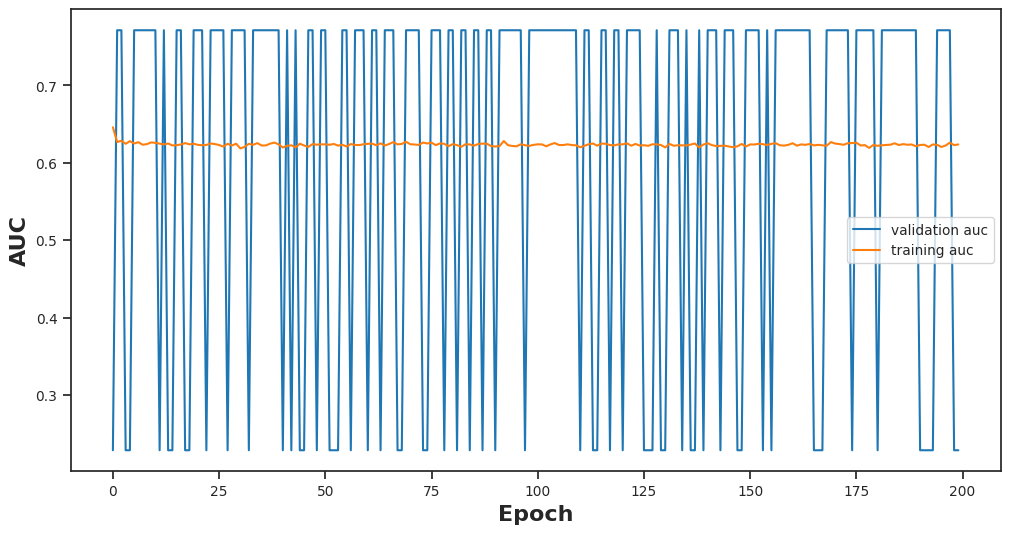

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adam(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                400       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 4618143.5000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

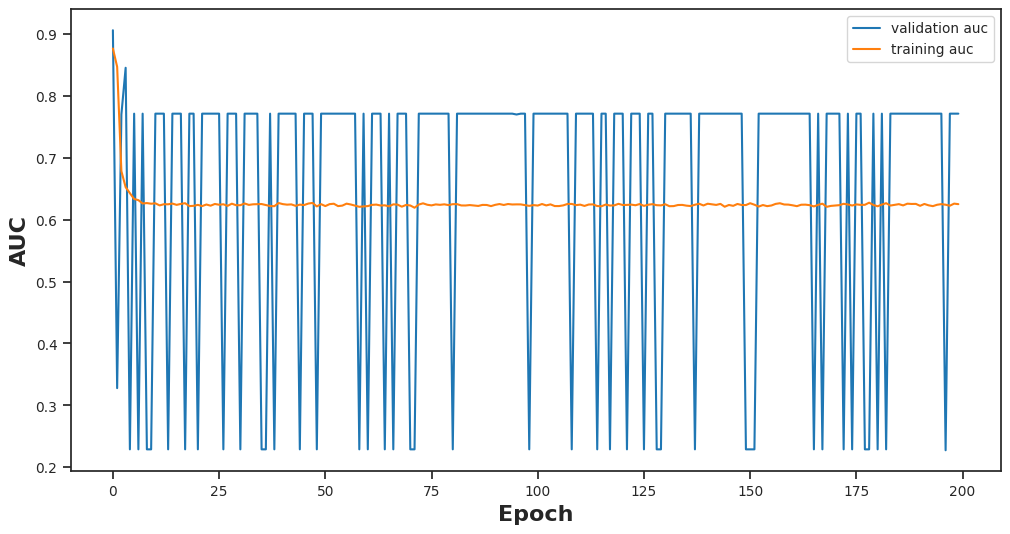

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])
modelo.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                400       
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dense_74 (Dense)            (None, 4)                 36        
                                                                 
 dense_75 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 2108296.5000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

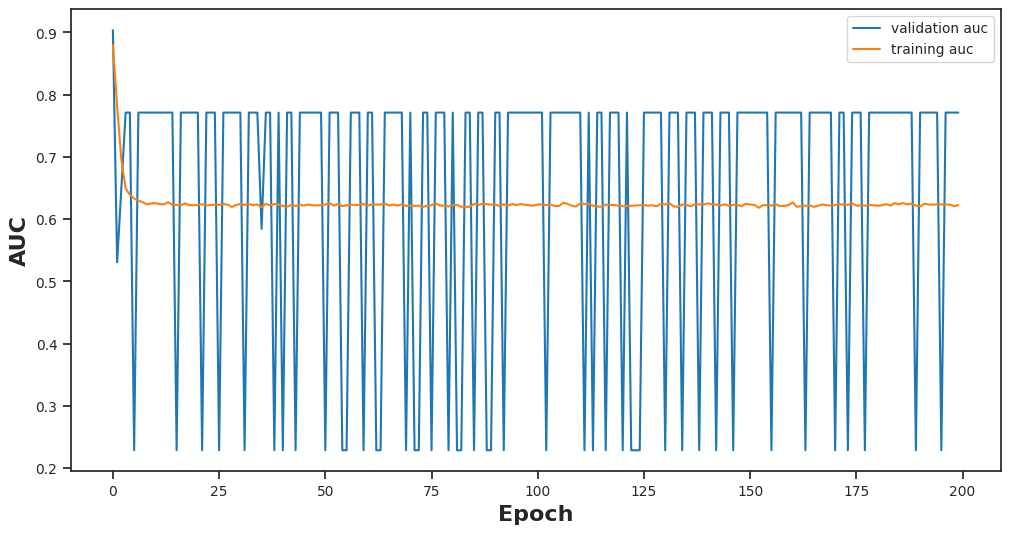

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adam(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 16)                400       
                                                                 
 dense_81 (Dense)            (None, 8)                 136       
                                                                 
 dense_82 (Dense)            (None, 4)                 36        
                                                                 
 dense_83 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 56540807168.0000 - auc: 0.2288


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.22877733409404755'

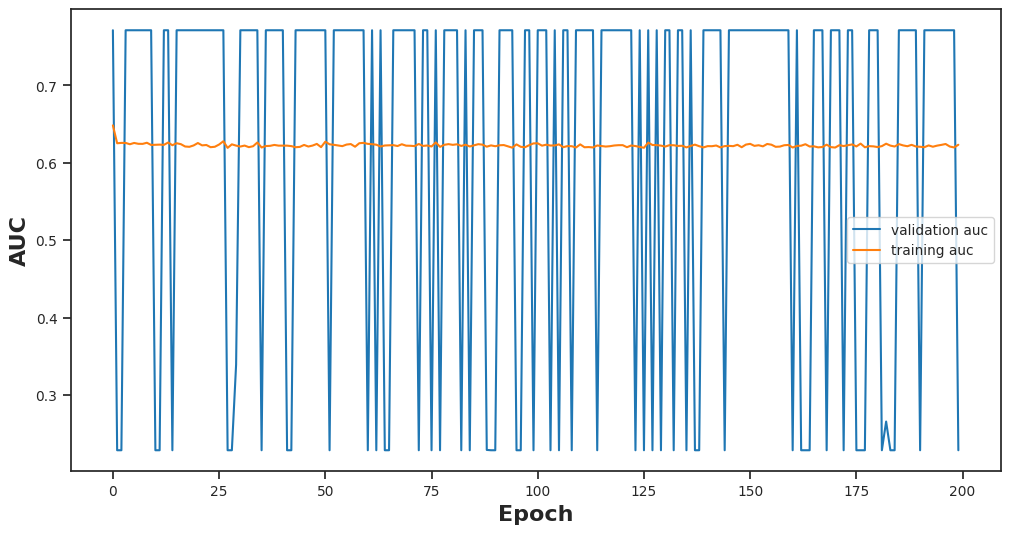

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adam(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                400       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 115747.0312 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

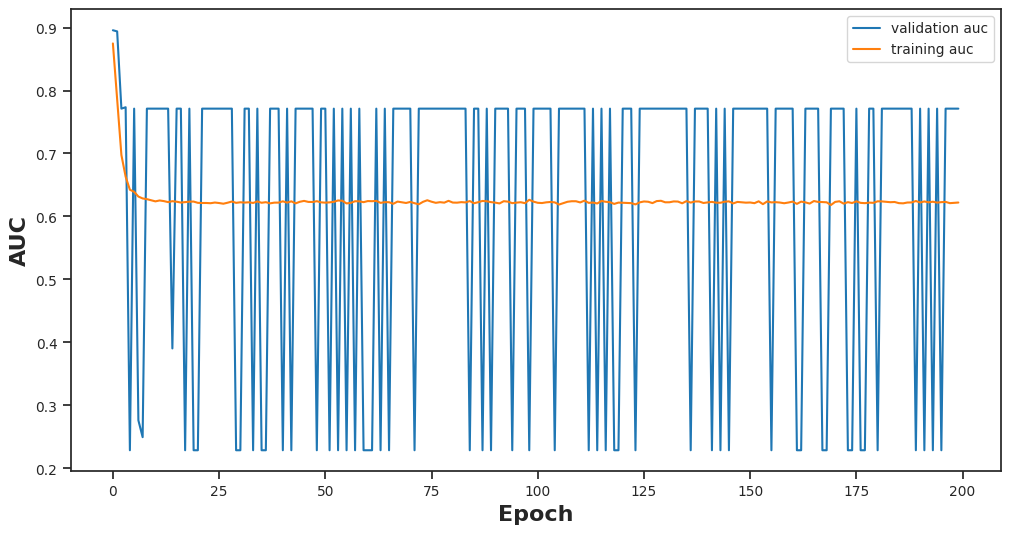

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

### Adadelta

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['AUC'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable pa

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.4161 - auc: 0.8818


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8817834854125977'

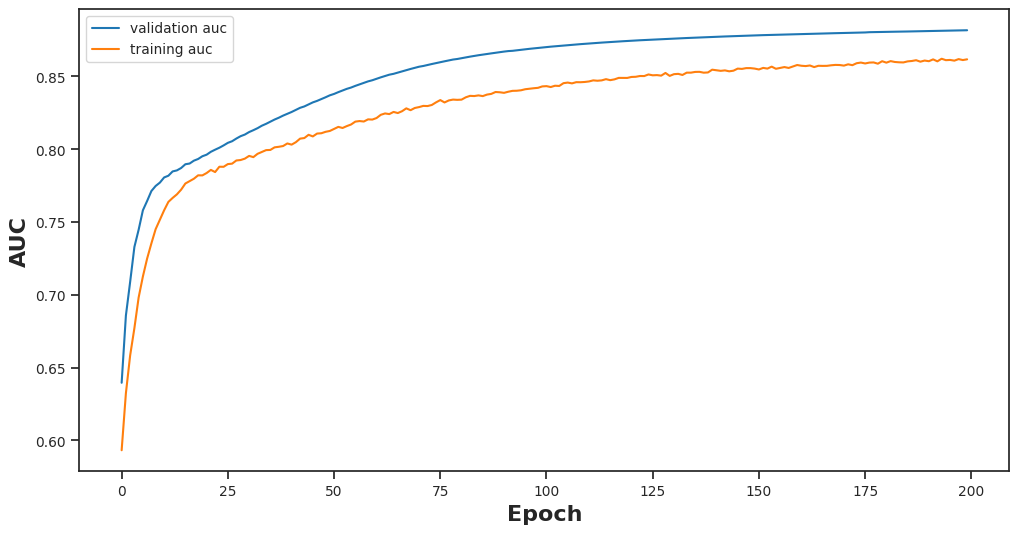

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                400       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.4429 - auc: 0.8843


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8842697143554688'

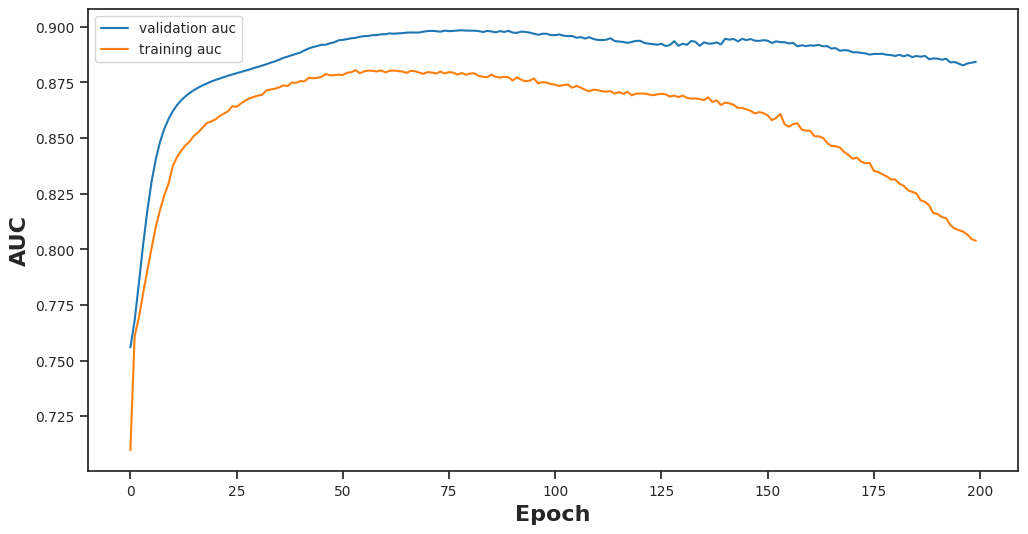

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                400       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 4s 2ms/step - loss: 0.4054 - auc: 0.8882


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8882380127906799'

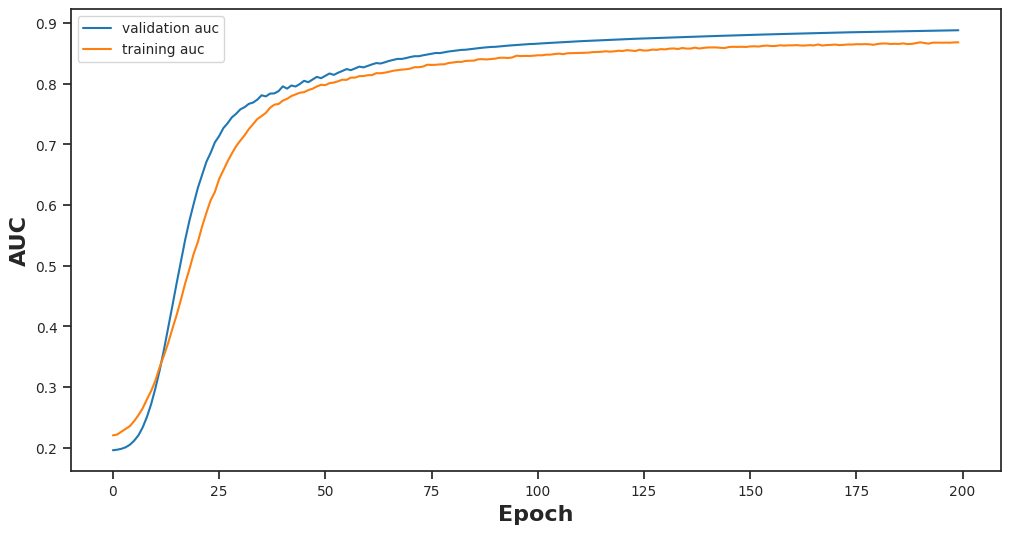

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['AUC'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                400       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.5030 - auc: 0.8803


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8803216218948364'

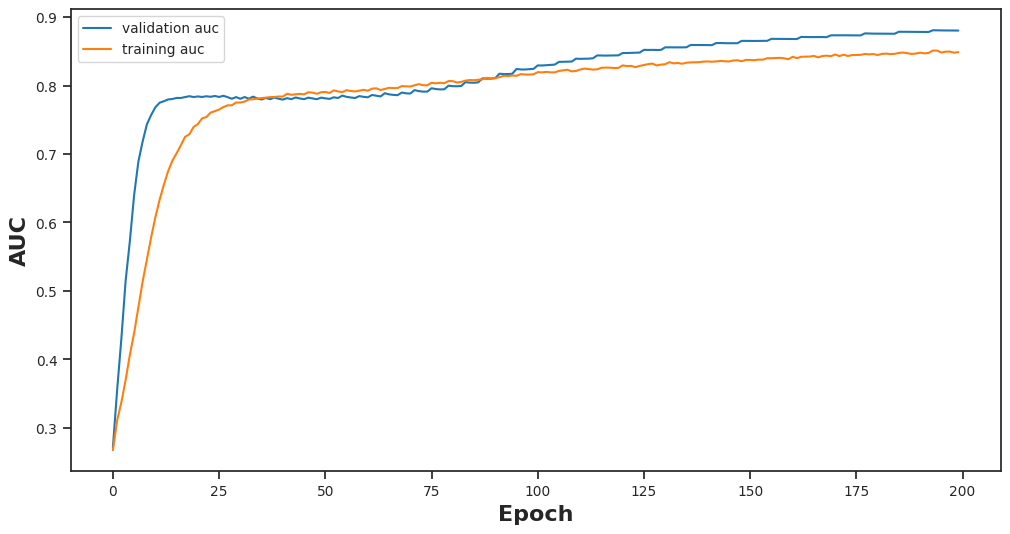

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                400       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.8756 - auc: 0.8771


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8771290183067322'

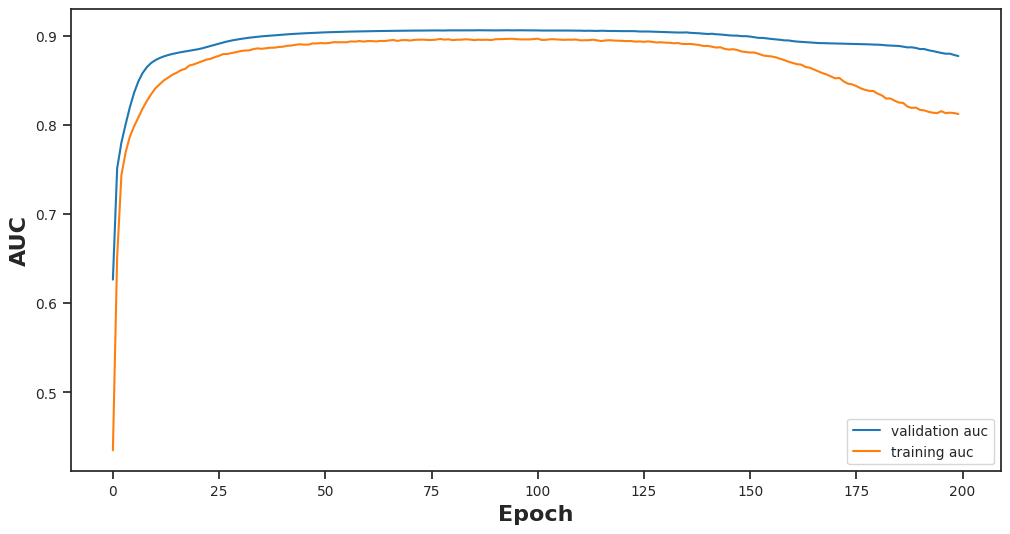

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                400       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dropout_15 (Dropout)        (None, 8)                 0         
                                                                 
 dense_30 (Dense)            (None, 4)                 36        
                                                                 
 dense_31 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.5067 - auc: 0.8817


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8817219734191895'

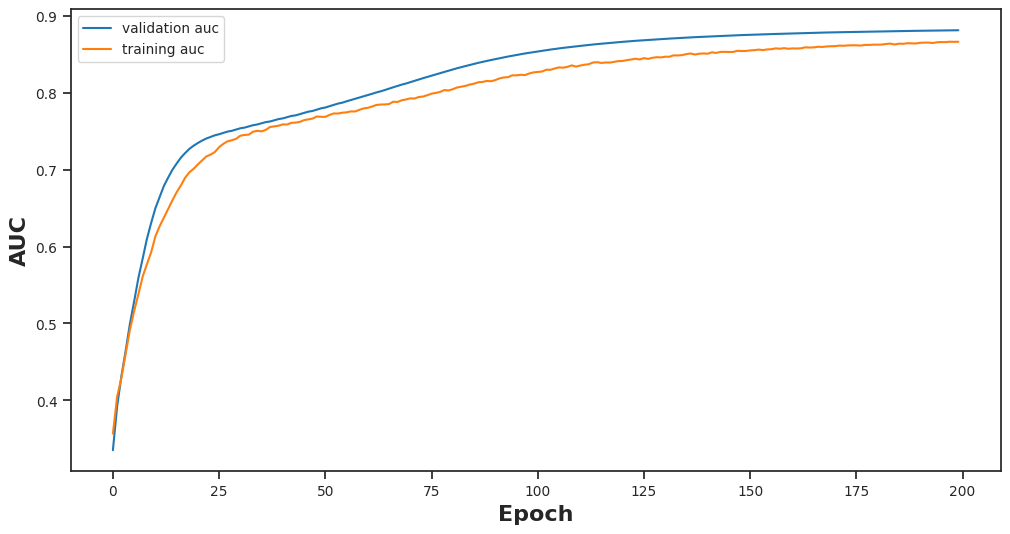

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['AUC'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                400       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.4157 - auc: 0.8975


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.897525429725647'

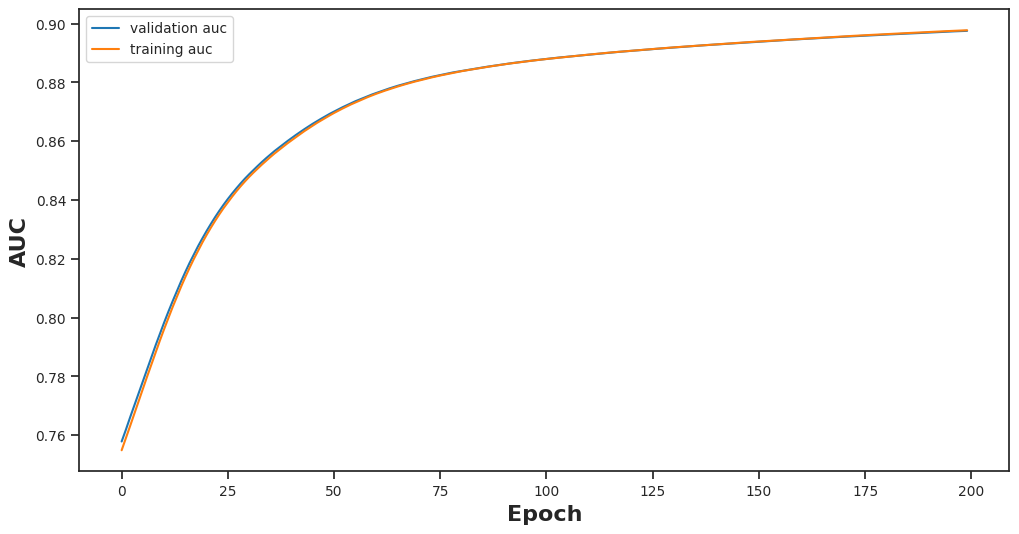

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                400       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.3681 - auc: 0.9125


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.9125279784202576'

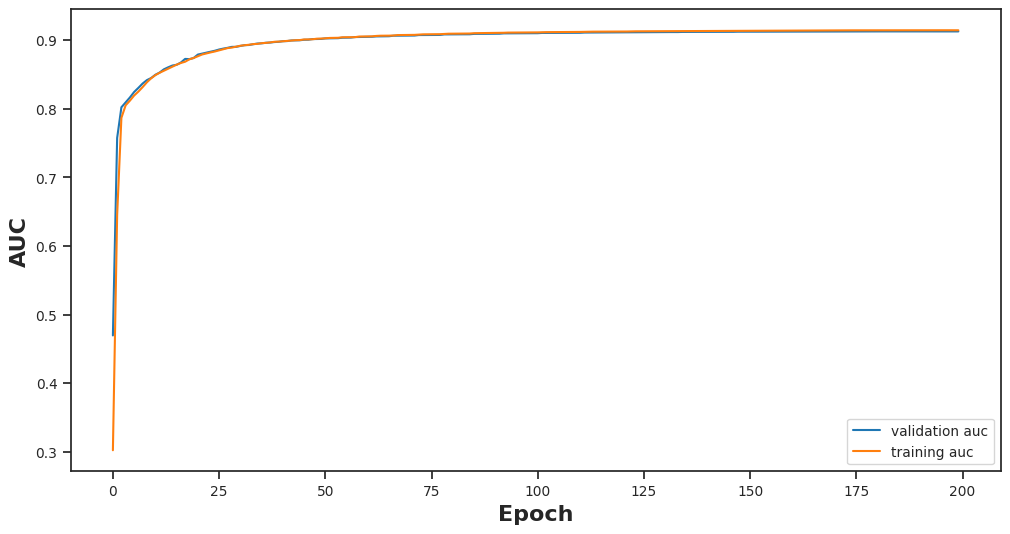

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                400       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.4042 - auc: 0.9013


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.9013141989707947'

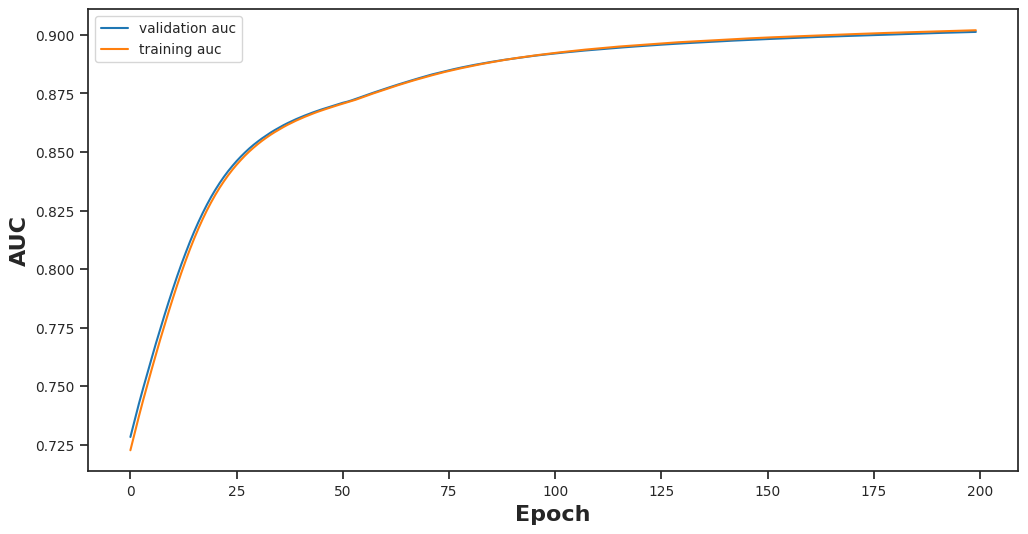

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

### RMSprop

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop()
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                400       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 4s 2ms/step - loss: 5456921.0000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

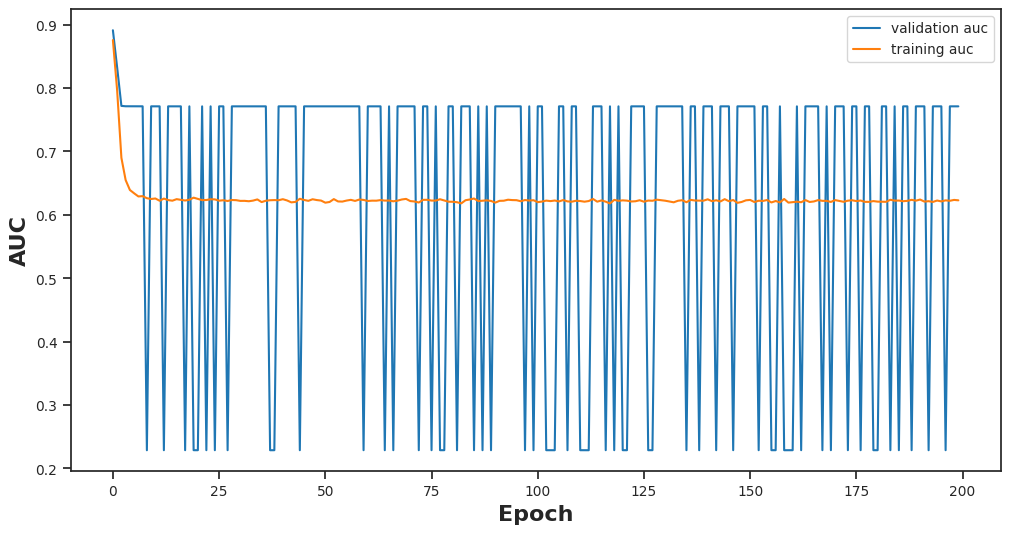

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.01)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                400       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 92254748672.0000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

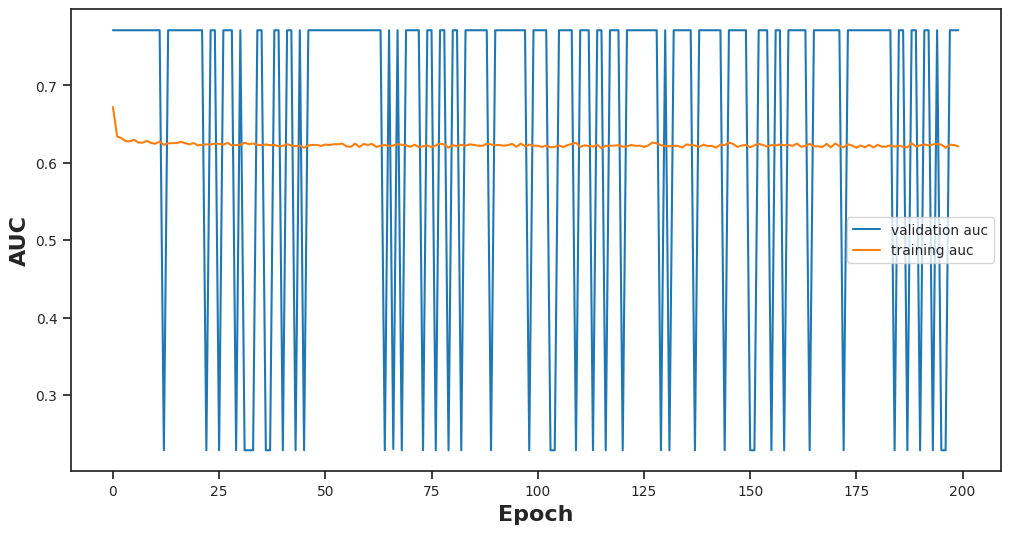

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                400       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 4s 3ms/step - loss: 9974887.0000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

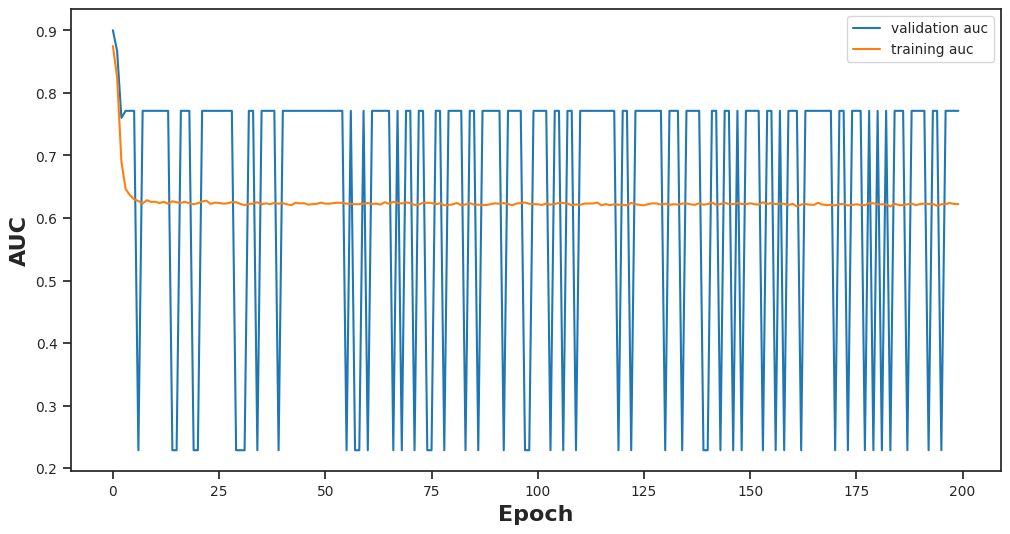

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop()
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                400       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 6198496.5000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

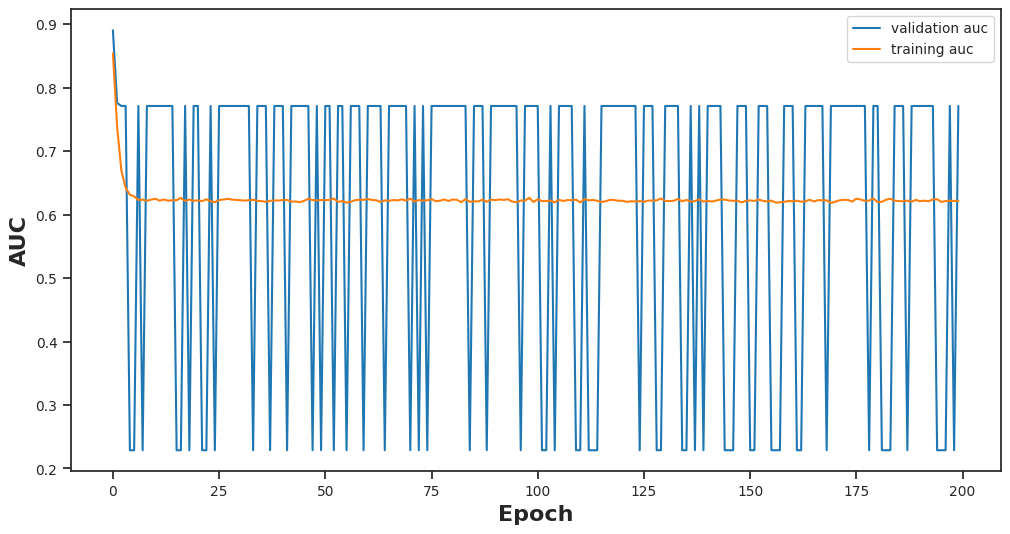

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.01)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                400       
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dropout_19 (Dropout)        (None, 8)                 0         
                                                                 
 dense_38 (Dense)            (None, 4)                 36        
                                                                 
 dense_39 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.5180 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

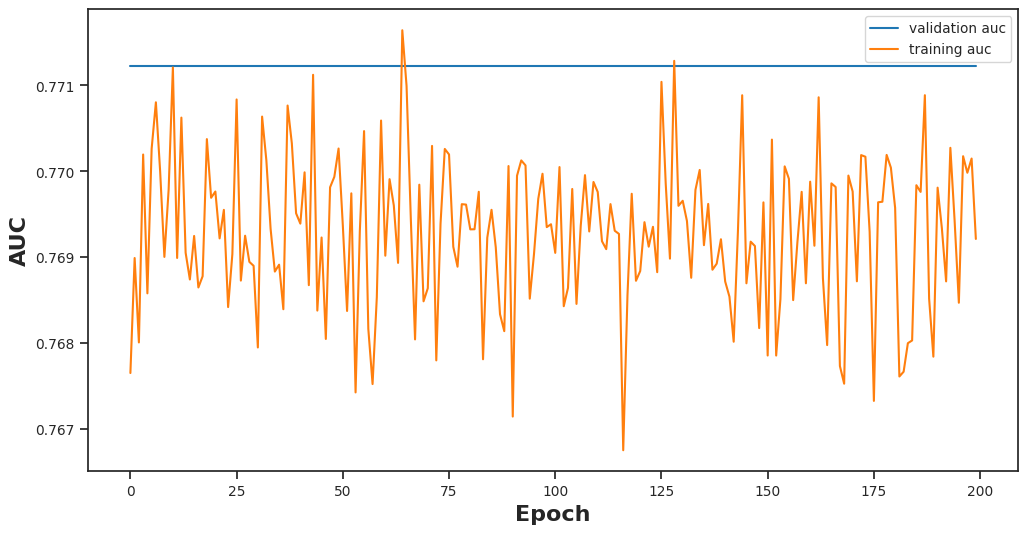

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                400       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_41 (Dense)            (None, 8)                 136       
                                                                 
 dropout_21 (Dropout)        (None, 8)                 0         
                                                                 
 dense_42 (Dense)            (None, 4)                 36        
                                                                 
 dense_43 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 10837464.0000 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

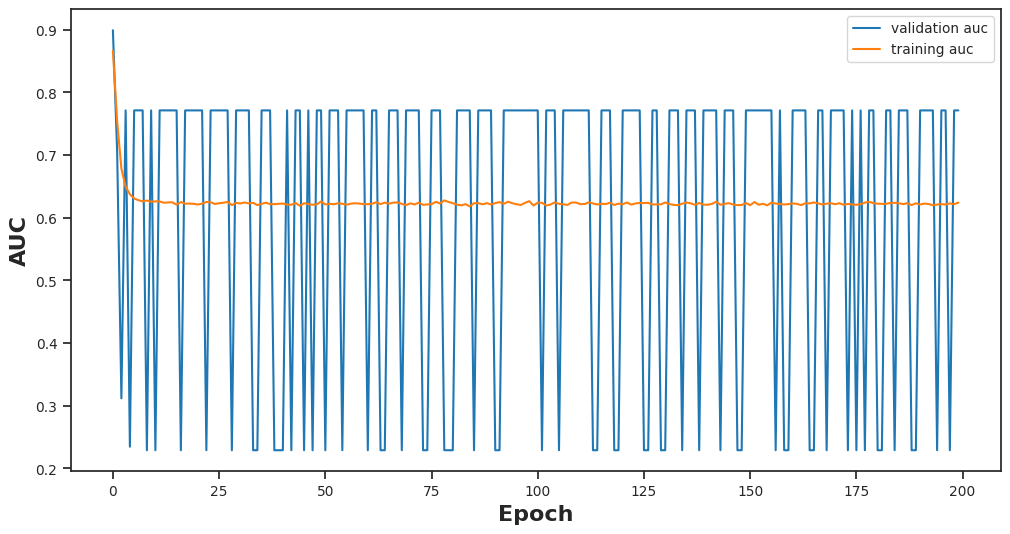

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.RMSprop()
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                400       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

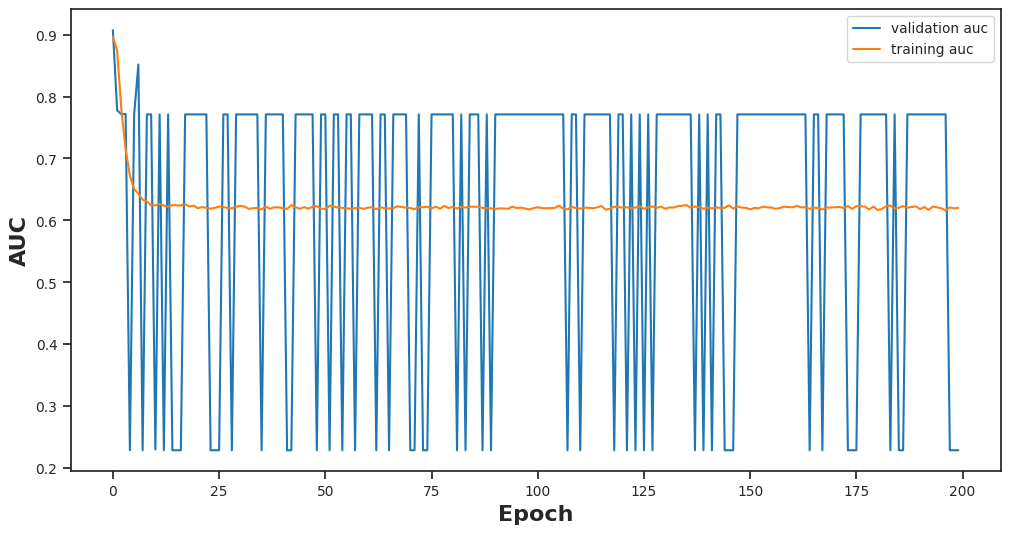

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

### SGD bis

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['AUC'])
modelo.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                400       
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dense_50 (Dense)            (None, 4)                 36        
                                                                 
 dense_51 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=100, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 125604230886025737434824704.0000 - auc: 0.2288


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.22877733409404755'

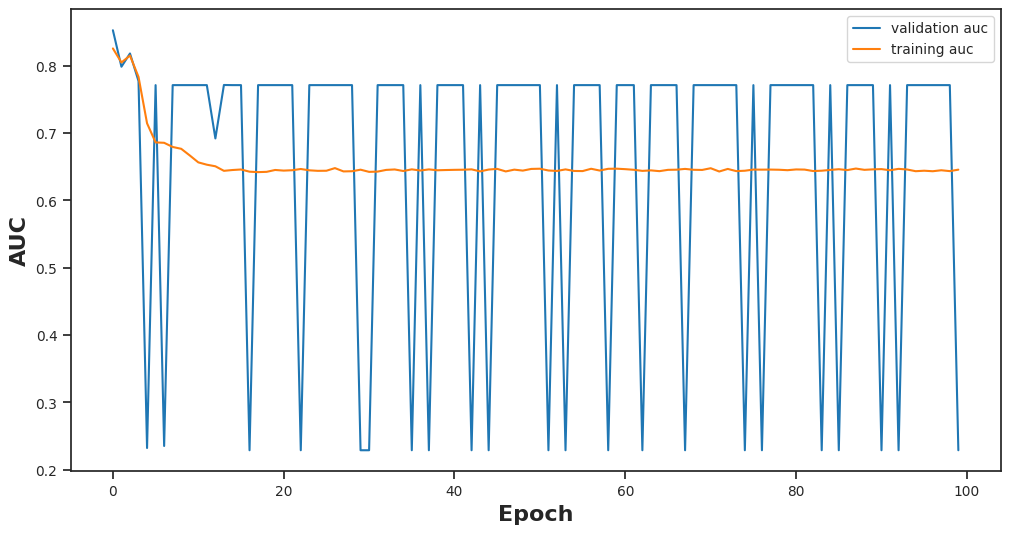

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.01)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 16)                400       
                                                                 
 dense_57 (Dense)            (None, 8)                 136       
                                                                 
 dense_58 (Dense)            (None, 4)                 36        
                                                                 
 dense_59 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=100, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.6249 - auc: 0.7712


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7712226510047913'

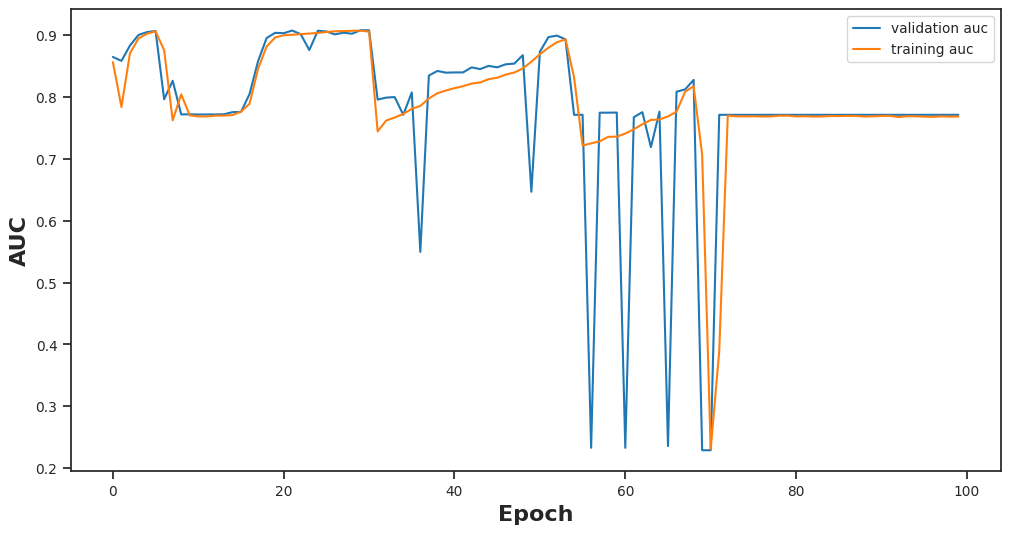

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                400       
                                                                 
 dense_61 (Dense)            (None, 8)                 136       
                                                                 
 dense_62 (Dense)            (None, 4)                 36        
                                                                 
 dense_63 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=100, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 3.0027 - auc: 0.7714


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.7713635563850403'

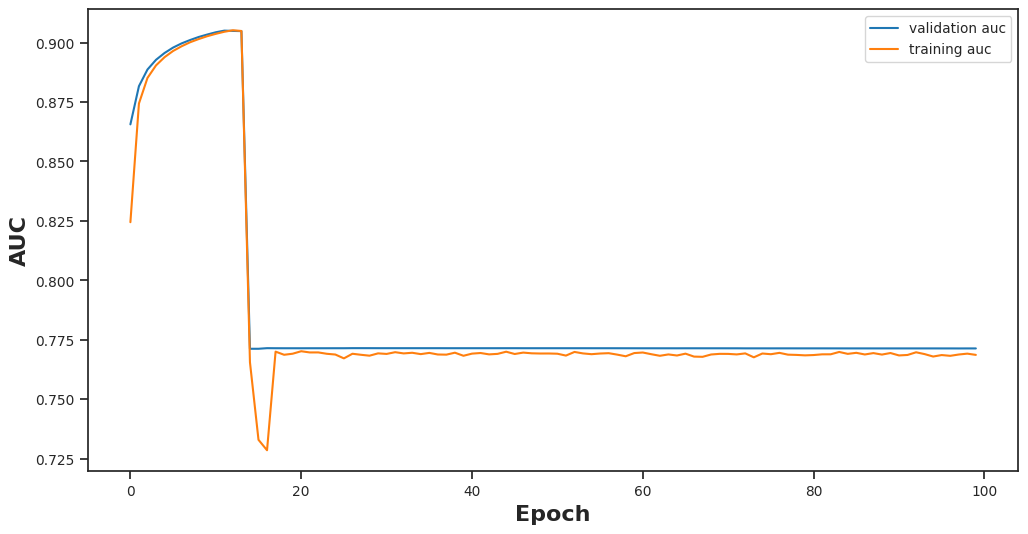

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.0001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 16)                400       
                                                                 
 dense_69 (Dense)            (None, 8)                 136       
                                                                 
 dense_70 (Dense)            (None, 4)                 36        
                                                                 
 dense_71 (Dense)            (None, 2)                 10        
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=100, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.4151 - auc: 0.8981


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8981193900108337'

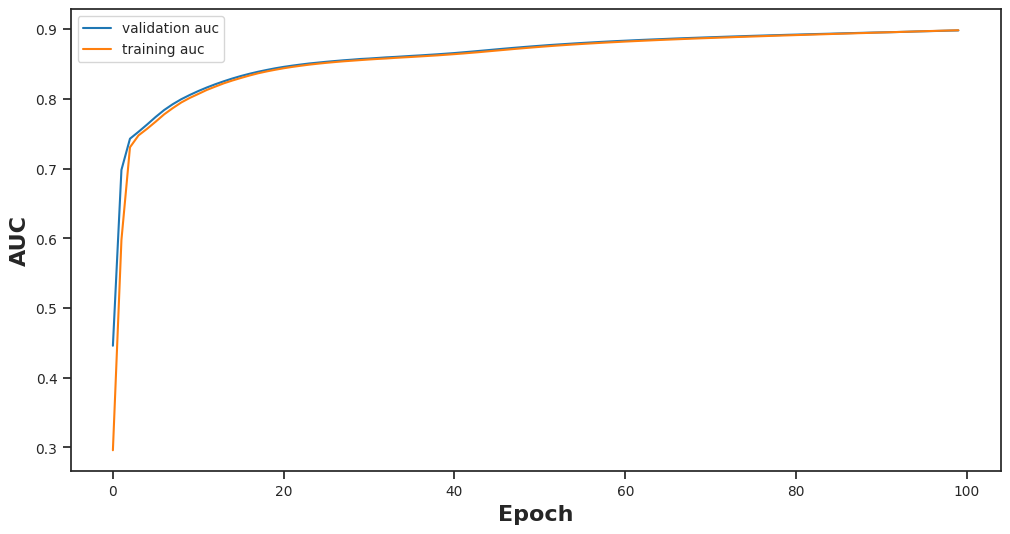

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

# One hot encoding

In [ ]:
hamburguesas_values_ohe = one_hot_encoding(scaled_hamburguesas_values_sn)
hamburguesas_target_ohe = one_hot_encoding(hamburguesas_target)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(
    hamburguesas_values_ohe, hamburguesas_target_ohe, test_size=0.4, random_state=66
)

### SGD

In [ ]:
modelo = Sequential()
modelo.add(Dense(10, input_shape=(105,), activation='tanh'))
modelo.add(Dense(2, activation='softmax'))

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                1060      
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.3629 - auc: 0.9084


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.9083628058433533'

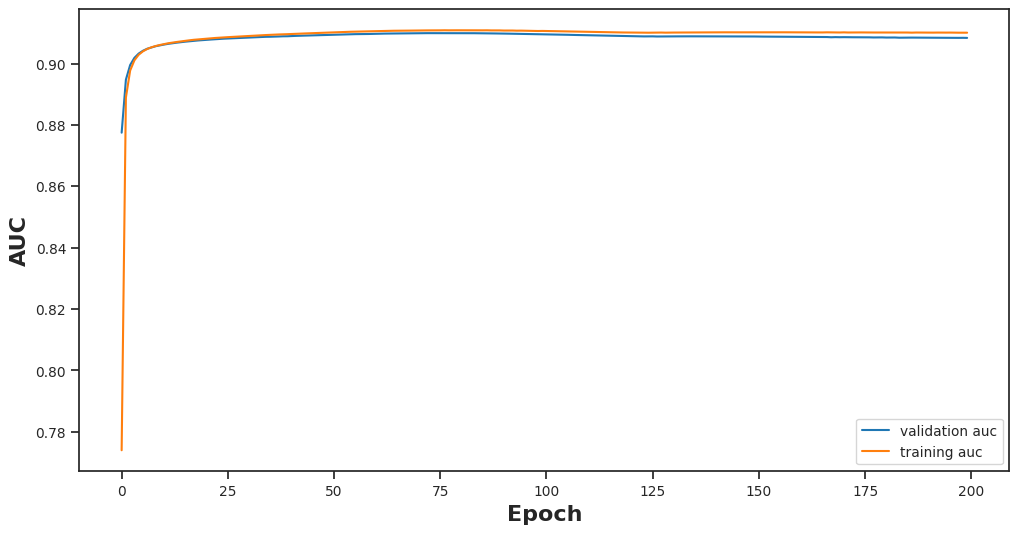

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(105,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.0001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                1696      
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 2)                 10        
                                                                 
Total params: 1,878
Trainable params: 1,878
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=100, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.4157 - auc: 0.9017


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.9016509056091309'

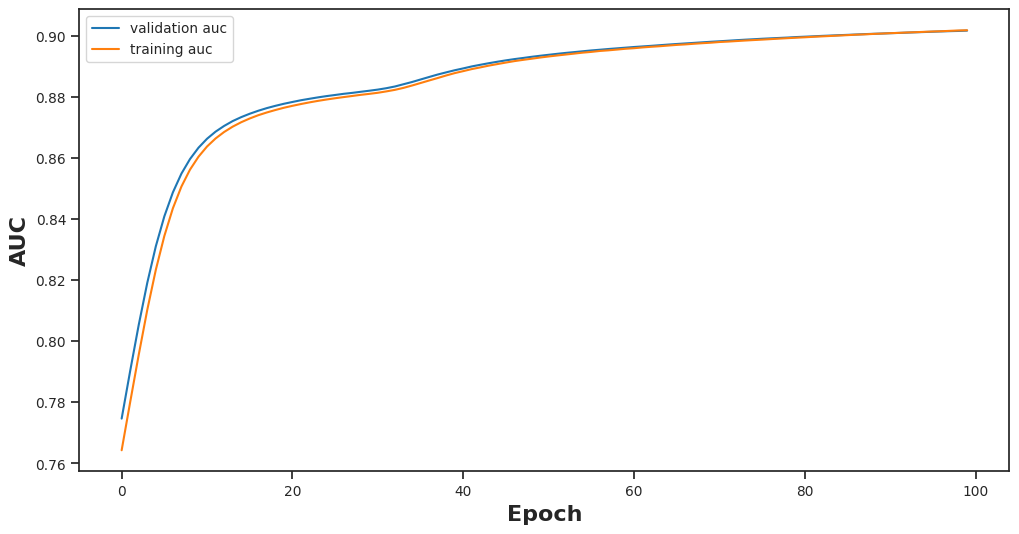

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

### Adadelta

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(105,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(2, activation="softmax"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                1696      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 1,878
Trainable params: 1,878
Non-traina

In [ ]:
historia = modelo.fit(
    X_train.values, y_train.values, epochs=200, validation_data=(X_validation.values, y_validation.values)
)

In [ ]:
scores = modelo.evaluate(X_validation, y_validation)

1455/1455 [==============================] - 3s 2ms/step - loss: 0.3853 - auc: 0.8959


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.8959166407585144'

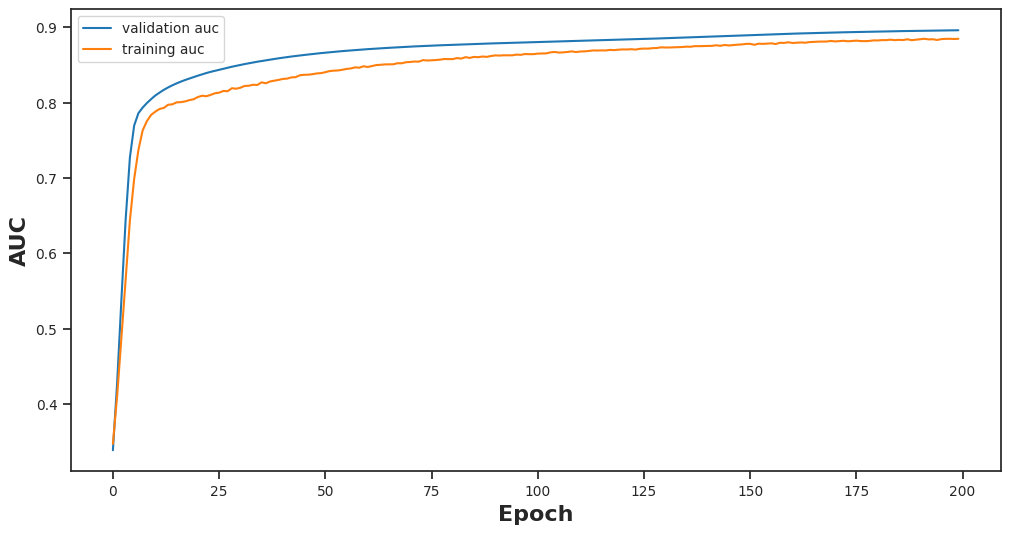

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()